# 6、自编码器-MNIST
中文原文：[自动编码器：各种各样的自动编码器](http://keras-cn.readthedocs.io/en/latest/blog/autoencoder/)<br/>
英文原文：[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)<br/>
参考资料：[自编码(Autoencoder)](https://wenku.baidu.com/view/09b5ee2f524de518974b7d38.html)

## 0、编码器介绍
![](http://ogtxggxo6.bkt.clouddn.com/autoencoder_schema.jpg?imageslim)
自动编码器是一种数据的压缩算法，其中数据的压缩和解压缩函数是1）数据相关的,2）有损的，3）从样本中自动学习的。在大部分提到自动编码器的场合，压缩和解压缩的函数是通过神经网络实现的。

1）自动编码器是数据相关的（data-specific 或 data-dependent），这意味着自动编码器只能压缩那些与训练数据类似的数据。自编码器与一般的压缩算法，如MPEG-2，MP3等压缩算法不同，一般的通用算法只假设了数据是“图像”或“声音”，而没有指定是哪种图像或声音。比如，使用人脸训练出来的自动编码器在压缩别的图片，比如树木时性能很差，因为它学习到的特征是与人脸相关的。

2）自动编码器是有损的，意思是解压缩的输出与原来的输入相比是退化的，MP3，JPEG等压缩算法也是如此。这与无损压缩算法不同。

3）自动编码器是从数据样本中自动学习的，这意味着很容易对指定类的输入训练出一种特定的编码器，而不需要完成任何新工作。

搭建一个自动编码器需要完成下面三样工作：搭建编码器，搭建解码器，设定一个损失函数，用以衡量由于压缩而损失掉的信息。编码器和解码器一般都是参数化的方程，并关于损失函数可导，典型情况是使用神经网络。编码器和解码器的参数可以通过最小化损失函数而优化，例如SGD。

### 自编码器是一个好的数据压缩算法吗

通常情况下，使用自编码器做数据压缩，性能并不怎么样。以图片压缩为例，想要训练一个能和JPEG性能相提并论的自编码器非常困难，并且要达到这个性能，你还必须要把图片的类型限定在很小的一个范围内（例如JPEG不怎么行的某类图片）。自编码器依赖于数据的特性使得它在面对真实数据的压缩上并不可行，你只能在指定类型的数据上获得还可以的效果，但谁知道未来会有啥新需求？

那么，自编码器擅长做什么？

自编码器在实际应用中用的很少，2012年人们发现在卷积神经网络中使用自编码器做逐层预训练可以训练深度网络，但很快人们发现良好的初始化策略在训练深度网络上要比费劲的逐层预训练有效得多，2014年出现的Batch Normalization技术使得更深的网络也可以被有效训练，到了2015年底，通过使用残差学习（ResNet）我们基本上可以训练任意深度的神经网络。

目前自编码器的应用主要有两个方面，第一是数据去噪，第二是为进行可视化而降维。配合适当的维度和稀疏约束，自编码器可以学习到比PCA等技术更有意思的数据投影。

对于2D的数据可视化，[t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)（读作tee-snee）或许是目前最好的算法，但通常还是需要原数据的维度相对低一些。所以，可视化高维数据的一个好办法是首先使用自编码器将维度降低到较低的水平（如32维），然后再使用t-SNE将其投影在2D平面上。Keras版本的t-SNE由Kyle McDonald实现了一下，放在了[这里](https://github.com/kylemcdonald/Parametric-t-SNE/blob/master/Parametric%20t-SNE%20(Keras).ipynb)，另外[scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)也有一个简单实用的实现。

### 自编码器有什么卵用

自编码器的出名来自于网上很多机器学习课程的介绍，总而言之，一堆新手非常热爱自编码器而且怎么也玩不够，这就是这篇文章出现的意义【告诉你自编码器有什么卵用】。

自编码器吸引了一大批研究和关注的主要原因之一是很长时间一段以来它被认为是解决无监督学习的可能方案，即大家觉得自编码器可以在没有标签的时候学习到数据的有用表达。再说一次，自编码器并不是一个真正的无监督学习的算法，而是一个自监督的算法。自监督学习是监督学习的一个实例，其标签产生自输入数据。要获得一个自监督的模型，你需要想出一个靠谱的目标跟一个损失函数，问题来了，仅仅把目标设定为重构输入可能不是正确的选项。基本上，要求模型在像素级上精确重构输入不是机器学习的兴趣所在，学习到高级的抽象特征才是。事实上，当你的主要任务是分类、定位之类的任务时，那些对这类任务而言的最好的特征基本上都是重构输入时的最差的那种特征。

在应用自监督学习的视觉问题中，可能应用自编码器的领域有例如拼图，细节纹理匹配（从低分辨率的图像块中匹配其高分辨率的对应块）。下面这篇文章研究了拼图问题，其实很有意思，不妨一读。[Unsupervised Learning of Visual Representations by Solving Jigsaw Puzzles](http://arxiv.org/abs/1603.09246).。此类问题的模型输入有些内置的假设，例如“视觉块比像素级的细节更重要”这样的，这种假设是普通的自编码器没有的
![](http://ogtxggxo6.bkt.clouddn.com/jigsaw-puzzle.png)

## 1.使用Keras建立简单的自编码器
首先，先建立一个全连接的编码器和解码器

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoder = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
decoder = Dense(784, activation='sigmoid')(encoder)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder)
autoencoder.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


下面我们训练自编码器，来重构MNIST中的数字，这里使用逐像素的交叉熵作为损失函数，优化器为adam

In [2]:
from keras import optimizers
# Ada = optimizers.Adadelta(lr=5.0)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

然后准备MNIST数据，将其归一化和向量化，然后训练：

In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                verbose=2,
                validation_data=(x_test, x_test))

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
7s - loss: 0.6835 - val_loss: 0.6607
Epoch 2/30
1s - loss: 0.6440 - val_loss: 0.6273
Epoch 3/30
1s - loss: 0.6111 - val_loss: 0.5952
Epoch 4/30
1s - loss: 0.5802 - val_loss: 0.5656
Epoch 5/30
1s - loss: 0.5519 - val_loss: 0.5386
Epoch 6/30
1s - loss: 0.5264 - val_loss: 0.5146
Epoch 7/30
1s - loss: 0.5037 - val_loss: 0.4932
Epoch 8/30
1s - loss: 0.4836 - val_loss: 0.4744
Epoch 9/30
1s - loss: 0.4658 - val_loss: 0.4577
Epoch 10/30
1s - loss: 0.4501 - val_loss: 0.4430
Epoch 11/30
1s - loss: 0.4362 - val_loss: 0.4299
Epoch 12/30
1s - loss: 0.4239 - val_loss: 0.4183
Epoch 13/30
1s - loss: 0.4129 - val_loss: 0.4079
Epoch 14/30
1s - loss: 0.4030 - val_loss: 0.3986
Epoch 15/30
1s - loss: 0.3942 - val_loss: 0.3902
Epoch 16/30
1s - loss: 0.3862 - val_loss: 0.3826
Epoch 17/30
1s - loss: 0.3790 - val_loss: 0.3758
Epoch 18/30
1s - loss: 0.3725 - val_loss: 0.3696
Epoch 19/30
1s - loss: 0.3665 - val_loss: 0.3639
Ep

50个epoch后，看起来我们的自编码器优化的不错了，损失是0.10，我们可视化一下重构出来的输出：

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


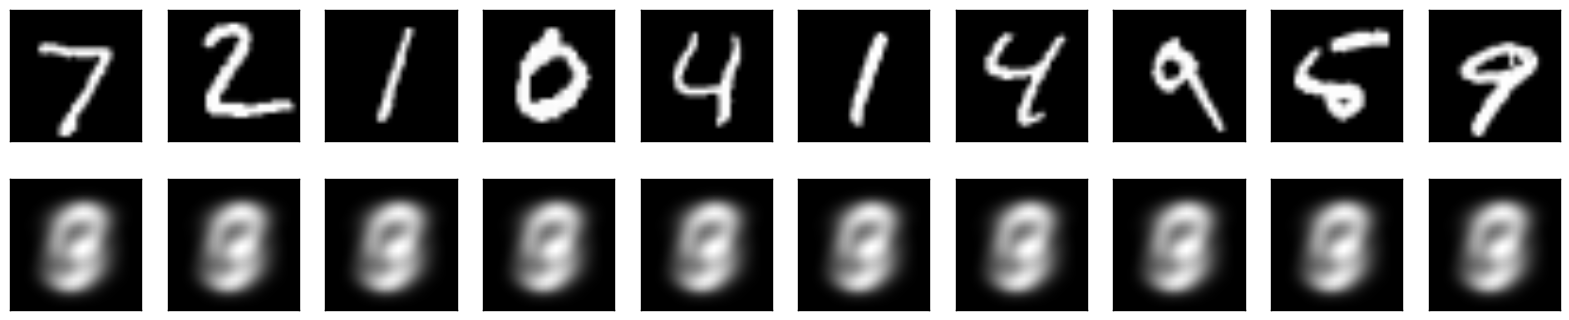

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Decode test images 
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.稀疏自编码器：为码字加上稀疏性约束
刚刚我们的隐层有32个神经元，这种情况下，一般而言自编码器学到的是PCA的一个近似（PCA不想科普了）。但是如果我们对隐层单元施加稀疏性约束的话，会得到更为紧凑的表达，只有一小部分神经元会被激活。在Keras中，我们可以通过添加一个activity_regularizer达到对某层激活值进行约束的目的：

In [5]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                verbose=2,
                validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
1s - loss: 0.6861 - val_loss: 0.6607
Epoch 2/30
1s - loss: 0.6440 - val_loss: 0.6273
Epoch 3/30
1s - loss: 0.6112 - val_loss: 0.5952
Epoch 4/30
1s - loss: 0.5802 - val_loss: 0.5656
Epoch 5/30
1s - loss: 0.5519 - val_loss: 0.5387
Epoch 6/30
1s - loss: 0.5264 - val_loss: 0.5146
Epoch 7/30
1s - loss: 0.5037 - val_loss: 0.4933
Epoch 8/30
1s - 

因为我们添加了正则性约束，所以模型过拟合的风险降低，我们可以训练多几次，这次训练100个epoch，得到损失为0.11，多出来的0.01基本上是由于正则项造成的。结果上没有毛线差别，区别在于编码出来的码字更加稀疏了。稀疏自编码器的在10000个测试图片上的码字均值为3.33，而之前的为7.30,以下代码就不再注释了。

## 3.深度自编码器：把自编码器叠起来

In [6]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                verbose=2,
                validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 784)               101136    
Total para

## 4.卷积自编码器：用卷积层搭建自编码器